In [ ]:
# Install SHAP library if it is not already installed
!pip install shap --quiet


In [ ]:
# Import required libraries for SHAP analysis and plotting
import shap
import matplotlib.pyplot as plt

/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the best trained model from the pickle file for SHAP analysis
import pickle

with open('../models/best_model_for_deployment.pkl', 'rb') as f:
    best_model = pickle.load(f)


In [ ]:
# Create a SHAP explainer object for the loaded model
explainer = shap.Explainer(best_model)

In [ ]:
# Create a TreeExplainer specifically for the CatBoost model (alternative to generic Explainer)
catboost_explainer = shap.TreeExplainer(best_model)

In [ ]:
# Load the test feature set (X_test) from the processed CSV file for SHAP value computation
import pandas as pd

X_test = pd.read_csv('../data/processed/X_test_scaled.csv')


In [ ]:
# Compute SHAP values for the test set using the explainer
shap_values = explainer.shap_values(X_test)

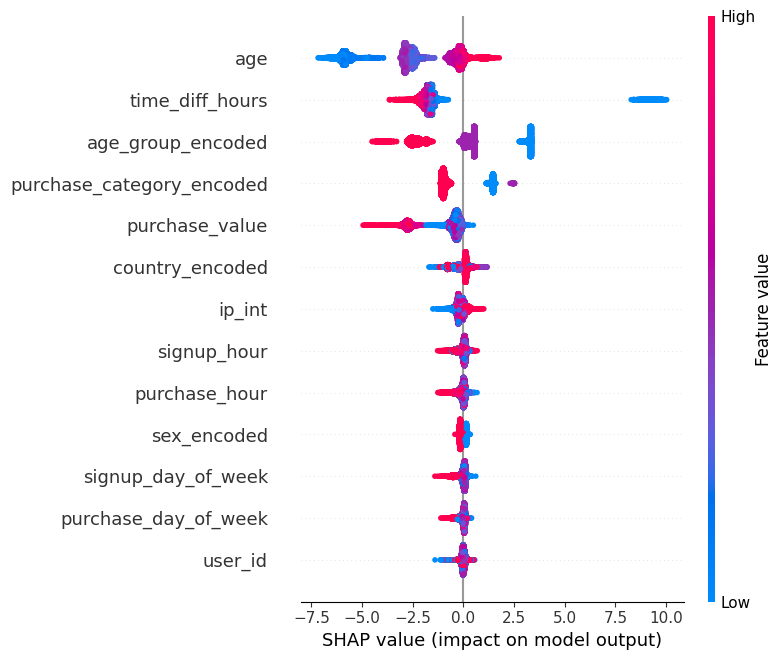

In [ ]:
# SHAP Summary Plot
# This plot shows the global feature importance for the model using SHAP values.
# Each point represents a SHAP value for a feature and an instance.
shap.summary_plot(shap_values, X_test)

<!-- This section describes and visualizes the SHAP summary plot for global feature importance -->
## SHAP Summary Plot
The SHAP summary plot below visualizes the global feature importance for the model. Each point represents the impact of a feature on the model output for a single sample. Features are ranked by their importance, and color indicates the feature value (red = high, blue = low).


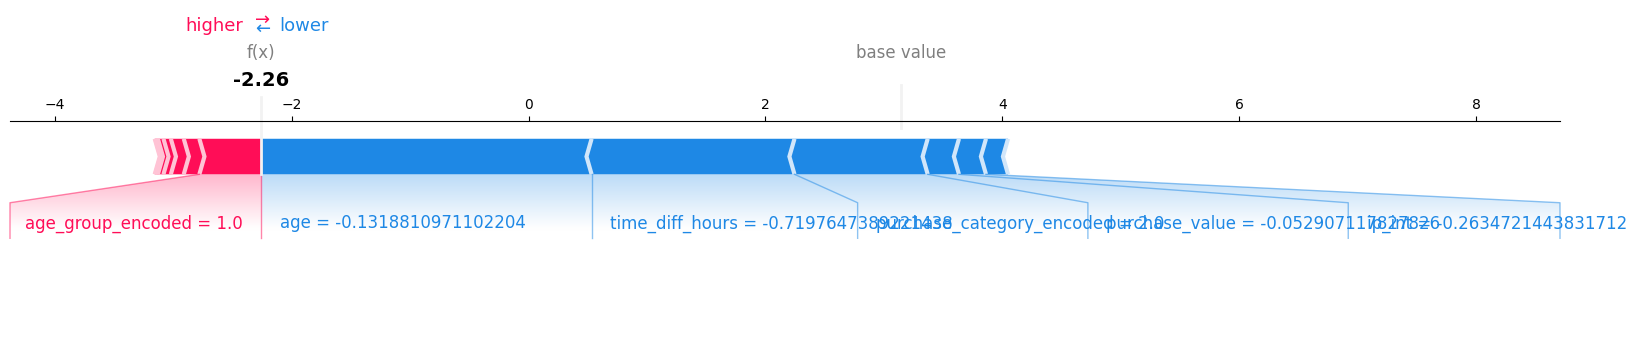

In [ ]:
# Visualize SHAP values for a single prediction (e.g., index 10) using a force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value, 
    shap_values[10], 
    X_test.iloc[10],
    matplotlib=True
)